In [1]:
# Loading the dataset function
from dataset_functions import *
from patches_functions import *

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Dataset
dataset_path = r"/home/arbash44/coding/hsi/PCBDataset/"
#HSI, HSI_general_masks, HSI_monoseg_masks, RGB, RGB_monoseg_masks, RGB_general_masks, PCB_Masks = read_dataset(dataset_path)
HSI, HSI_general_masks, HSI_monoseg_masks, _, _, _, _ = read_dataset(dataset_path)

  0%|          | 0/53 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
100%|██████████| 53/53 [00:03<00:00, 14.78it/s]

Dataset loading is complete.


In [3]:
# Clipping values outside [0, 1] range
HSI = clipping_neg_pos(HSI)

100%|██████████| 53/53 [00:31<00:00,  1.70it/s]

Clipping data is complete. No more negative values.


In [4]:
# Discarding the first 10 bands (noisy)
HSI = slicing(HSI,10)
HSI[0].shape

100%|██████████| 53/53 [00:01<00:00, 29.98it/s]

Skipping first 10 bands
The HS cubes have 214 channels, the first 10 are sliced out.


(272, 499, 214)

In [5]:
# HSI manual dataset splitting: 33% training - 5% Validation - 56% Testing
training = [1,3,8,11,17,22,23,24,25,32,34,44,45,47,49,50,52,53]
validation = [18, 37, 42] 
testing = [2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 26, 27, 28, 29, 30, 31, 33, 36, 38, 39, 40, 41, 43, 46, 48, 51]

## Training Patches

In [6]:
# Creating & Augmenting the training HS cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Training_cubes, Training_masks = Generate_Training_data(training, HSI, HSI_monoseg_masks)
len(Training_cubes), Training_cubes[0].shape, len(Training_masks), np.min(Training_cubes[0]), np.max(Training_cubes[0])

(126, (272, 499, 214), 126, 0.0, 1.0)

In [7]:
# Creating training patches
training_hsi_patches, training_mask_patches = create_patches(Training_cubes, Training_masks, patch_size=128)

(2226, 2226, (128, 128, 214), (128, 128))

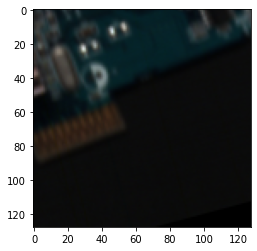

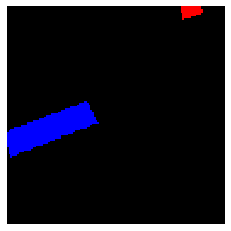

In [8]:
# Training patches visualization
i = 18
plt.imshow(training_hsi_patches[i][:,:,(92, 52, 31)])
plt.figure()
visualize(training_mask_patches[i])

# Checking sizes and shapes
len(training_hsi_patches), len(training_mask_patches), training_hsi_patches[0].shape, training_mask_patches[0].shape

In [10]:
# Saving patches for later loading during models training (optional)

for i, (cube, mask )in enumerate(zip(training_hsi_patches,training_mask_patches)):
    """
    Iterate over the HS training patch and their corresponding masks, saving them to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): HS training patch
        mask (numpy.ndarray): Corresponding training mask
    """
    # Define saving path
    saving_path = "Saving path"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the training patch
    name = f"{saving_path}{i}.hdr"
    
    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(name,cube,dtype=np.float32,ext = None, force = True)
    
    # Construct the filename for the training mask
    name = f"{saving_path}{i}.npy"
    
    # Save the training mask to a NumPy file
    np.save(name, mask)

## Validation Patches

In [11]:
# Validation cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks'
Validation_cubes, Validation_masks = Generate_data(validation, HSI, HSI_monoseg_masks)
len(Validation_cubes), Validation_cubes[0].shape, np.min(Validation_cubes[0]), np.max(Validation_cubes[0])

(3, (370, 560, 214), 0.0, 1.0)

In [12]:
# Creating validation patches
validation_hsi_patches, validation_mask_patches = create_patches(Validation_cubes, Validation_masks, patch_size=128)

(63, 63, (128, 128, 214), (128, 128))

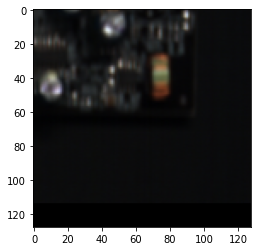

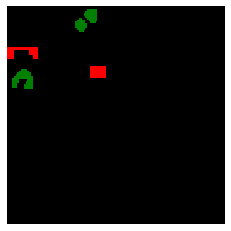

In [13]:
# Training patches visualization
i = 13
plt.imshow(validation_hsi_patches[i][:,:,(92, 52, 31)])
plt.figure()
visualize(validation_mask_patches[i])

# Checking sizes and shapes
len(validation_hsi_patches), len(validation_mask_patches), validation_hsi_patches[0].shape, validation_mask_patches[0].shape

In [18]:
# Saving patches for later loading during models training (optional!)

for i, (cube, mask )in enumerate(zip(validation_hsi_patches,validation_mask_patches)):
    """
    Iterate over the validation patche and their corresponding masks, saving them to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): HS validation patches
        mask (numpy.ndarray): Corresponding training mask
    """
    # Define saving path
    saving_path = "Saving path"
    
    # Construct the filename for the HS patch
    filename = f"{saving_path}{i}.hdr"

    # Save the HS patch to an ENVI header file
    envi.save_image(filename,cube,dtype=np.float32,ext = None, force = True)
    
    # Construct the filename for the valiadtion mask
    filename = f"{saving_path}{i}.npy"
    
    # Save the training mask to a NumPy file
    np.save(filename, mask)

## Testing Patches

In [19]:
# Testing cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks'
Testing_cubes, Testing_masks = Generate_data(testing, HSI, HSI_monoseg_masks)
len(Testing_cubes), Testing_cubes[0].shape, len(Testing_masks), np.min(Testing_cubes[0]), np.max(Testing_cubes[0])

(30, (1100, 1024, 214), 30, 0.0, 1.0)

In [20]:
# Creating testing patches
test_hsi_patches, test_mask_patches = create_patches(Testing_cubes, Testing_masks, patch_size=128)

(690, 690, (128, 128, 214), (128, 128))

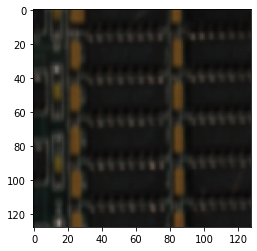

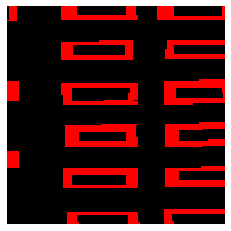

In [21]:
# Training patches visualization

i = 13
plt.imshow(test_hsi_patches[i][:,:,(92, 52, 31)])
plt.figure()
visualize(test_mask_patches[i])

# Checking sizes and shapes
len(test_hsi_patches), len(test_mask_patches), test_hsi_patches[0].shape, test_mask_patches[0].shape

In [24]:
for i, (cube, mask )in enumerate(zip(test_hsi_patches,test_mask_patches)):
    """
    Iterate over the test patches and their corresponding masks, saving them to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): HS testing patch
        mask (numpy.ndarray): Corresponding training mask
    """
    # Define saving path
    saving_path = "Saving path"
    
    # Construct the filename for the HS patch
    filename = f"{saving_path}{i}.hdr"
    
    # Save the HS patch cube to an ENVI header file
    envi.save_image(filename,cube,dtype=np.float32,ext = None,force = True)
    
    # Construct the filename for the testing mask
    filename = f"{saving_path}{i}.npy"
    
    # Save the training mask to a NumPy file
    np.save(name, mask)